In [5]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import datetime

In [2]:
print(tf.__version__)

2.9.2


In [3]:
df = pd.read_csv('/content/drive/MyDrive/municipality_bus_utilization.csv')

In [4]:
#glimpse to dataset
df.head(20)

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019
5,2017-06-04 07:59:42,5,70,587
6,2017-06-04 07:59:42,2,273,697
7,2017-06-04 07:59:42,1,129,397
8,2017-06-04 07:59:42,6,597,3113
9,2017-06-04 07:59:42,3,623,1930


In [5]:
df.shape

(13070, 4)

In [6]:
#Lets check our municipality_id
df.municipality_id.unique()

array([9, 8, 4, 0, 7, 5, 2, 1, 6, 3])

In [7]:
#every value has same  number of rows
df['municipality_id'].value_counts()

9    1307
8    1307
4    1307
0    1307
7    1307
5    1307
2    1307
1    1307
6    1307
3    1307
Name: municipality_id, dtype: int64

In [8]:
#verify its equal to shape of dataframe
1307*10

13070

In [9]:
#Checking any NAN value
df.isna().sum()

timestamp          0
municipality_id    0
usage              0
total_capacity     0
dtype: int64

In [10]:
#Describe dataframe
df.describe()

,municipality_id,usage,total_capacity
count,13070.000000,13070.000000,13070.000000
mean,4.500000,876.002984,1972.800000
std,2.872391,679.287109,1144.074782
min,0.000000,11.000000,397.000000
25%,2.000000,403.000000,697.000000
50%,4.500000,692.000000,1974.500000
75%,7.000000,1190.000000,2947.000000
max,9.000000,3508.000000,3893.000000


In [11]:
#It seems messy but i wanna show you step by step;
# convert the timestamp column to datetime
df['date'] = pd.to_datetime(df['timestamp'])

# extract hour from the timestamp column to create an time_hour column
hour = df['hour'] = df['date'].dt.hour
#minute = df['minute'] = df['timestamp'].dt.minute
time = df['time'] = df['date'].dt.date
municipality_id = df.iloc[:,1:2].values

municipality_id = pd.DataFrame(data=municipality_id, columns = ['municipality_id'])
others = df.iloc[:,2:4].values
others = pd.DataFrame(data=others, columns = ['usage', 'total_capacity'])
data = pd.concat([df['date'], municipality_id], axis=1)
data = pd.concat([data, others], axis=1)

**AS you know I should aggregate both municipality_id and half hours to 1 hour frequency, and choose max number of usage for each hours. Other problem is Data frame got only working hours 7 to 16 and some days and some hours are missing so i need to fill them. I dont have any method to solve this problems so You will see alot of manual coding instead of loops, or functions.**

In [12]:
data.head()

,date,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019


In [13]:
#Used Grouper function here so date frequency hourly and municipality_id is grouped and we chose max usage number for hour
processed_data=data.groupby([pd.Grouper(key='date', freq='H'), 'municipality_id'], as_index=True)['usage'].max()
processed_data.to_csv('file1.csv')

In [50]:
#I think i saved it results until this point.Reason is parsing I assume.
dataframe = pd.read_csv('/content/file1.csv',parse_dates=['date'],
                       index_col='date')

In [51]:
#Split dataframe for each  municipality_id
df0 = dataframe[dataframe['municipality_id'] == 0]
df1 = dataframe[dataframe['municipality_id'] == 1]
df2 = dataframe[dataframe['municipality_id'] == 2]
df3 = dataframe[dataframe['municipality_id'] == 3]
df4 = dataframe[dataframe['municipality_id'] == 4]
df5 = dataframe[dataframe['municipality_id'] == 5]
df6 = dataframe[dataframe['municipality_id'] == 6]
df7 = dataframe[dataframe['municipality_id'] == 7]
df8 = dataframe[dataframe['municipality_id'] == 8]
df9 = dataframe[dataframe['municipality_id'] == 9]
dflist =[df0,df1,df2,df3,df4,df5,df6,df7,df8,df9]

In [35]:
df0.shape

(770, 1)

Text(0, 0.5, 'Usage of bus')

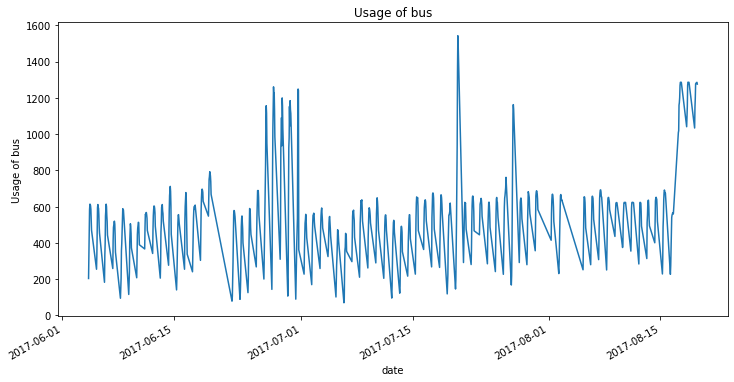

In [20]:
#preview of our target through whole year
df0['usage'].plot(figsize=(12,6), title= 'Usage of bus')
plt.ylabel("Usage of bus")

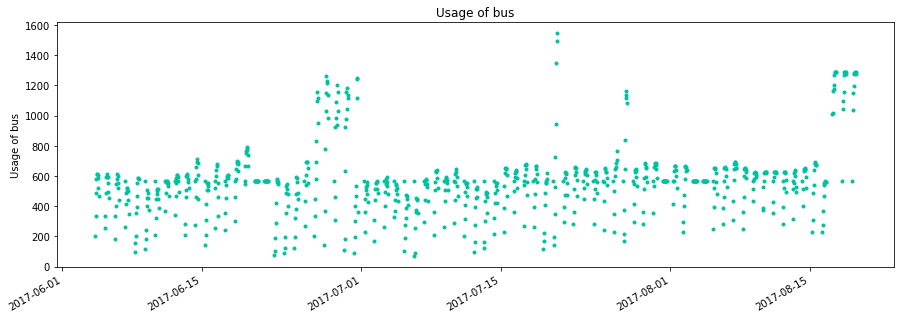

In [36]:
#We have missing points
color_pal = ['#F8766D','#D39200','#93AA00','#00BA38','#00C19F','#00B9E3','#619CFF','#DB72FB']
df0['usage'].plot(style='.',figsize=(15,5),color=color_pal[4],title='Usage of bus')
plt.ylabel("Usage of bus")
plt.show()

In [10]:
#Created variable a which is restrict hour in daytime instead of 24h its working hours only 7-16
a = pd.date_range(start="2017-06-04 07:00:00", end="2017-08-19 16:00:00", freq="H") #continous dates
a =a[a.indexer_between_time('07:00:00', '16:00:00')]
b = df0.index #our time series
diff_dates = a.difference(b)

In [23]:
print(a)

DatetimeIndex(['2017-06-04 07:00:00', '2017-06-04 08:00:00',
               '2017-06-04 09:00:00', '2017-06-04 10:00:00',
               '2017-06-04 11:00:00', '2017-06-04 12:00:00',
               '2017-06-04 13:00:00', '2017-06-04 14:00:00',
               '2017-06-04 15:00:00', '2017-06-04 16:00:00',
               ...
               '2017-08-19 07:00:00', '2017-08-19 08:00:00',
               '2017-08-19 09:00:00', '2017-08-19 10:00:00',
               '2017-08-19 11:00:00', '2017-08-19 12:00:00',
               '2017-08-19 13:00:00', '2017-08-19 14:00:00',
               '2017-08-19 15:00:00', '2017-08-19 16:00:00'],
              dtype='datetime64[ns]', length=770, freq=None)


In [52]:
#Solved problem and applied it manually
df0 = df0.reindex(a)
df0['municipality_id'].fillna((df0['municipality_id'].mean()), inplace=True)
df0['usage'].fillna((df0['usage'].mean()), inplace=True)

df1 = df1.reindex(a)
df1['municipality_id'].fillna((df1['municipality_id'].mean()), inplace=True)
df1['usage'].fillna((df1['usage'].mean()), inplace=True)

df2 = df2.reindex(a)
df2['municipality_id'].fillna((df2['municipality_id'].mean()), inplace=True)
df2['usage'].fillna((df2['usage'].mean()), inplace=True)

df3 = df3.reindex(a)
df3['municipality_id'].fillna((df3['municipality_id'].mean()), inplace=True)
df3['usage'].fillna((df3['usage'].mean()), inplace=True)

df4 = df4.reindex(a)
df4['municipality_id'].fillna((df4['municipality_id'].mean()), inplace=True)
df4['usage'].fillna((df5['usage'].mean()), inplace=True)

df5 = df5.reindex(a)
df5['municipality_id'].fillna((df5['municipality_id'].mean()), inplace=True)
df5['usage'].fillna((df5['usage'].mean()), inplace=True)

df6 = df6.reindex(a)
df6['municipality_id'].fillna((df6['municipality_id'].mean()), inplace=True)
df6['usage'].fillna((df6['usage'].mean()), inplace=True)

df7 = df7.reindex(a)
df7['municipality_id'].fillna((df7['municipality_id'].mean()), inplace=True)
df7['usage'].fillna((df7['usage'].mean()), inplace=True)

df8 = df8.reindex(a)
df8['municipality_id'].fillna((df8['municipality_id'].mean()), inplace=True)
df8['usage'].fillna((df8['usage'].mean()), inplace=True)

df9 = df9.reindex(a)
df9['municipality_id'].fillna((df9['municipality_id'].mean()), inplace=True)
df9['usage'].fillna((df9['usage'].mean()), inplace=True)

Text(0, 0.5, 'Usage of bus')

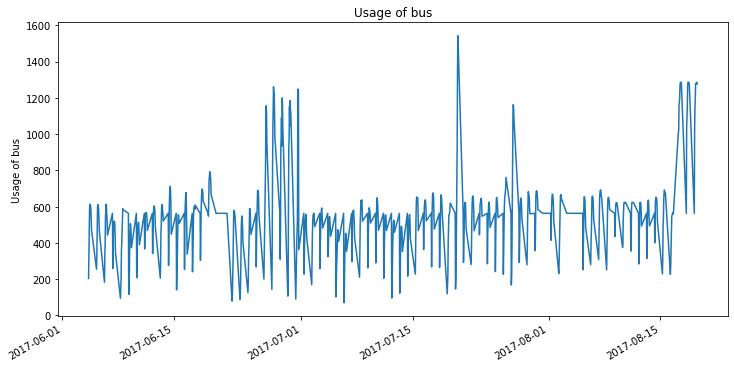

In [25]:
#preview of our target through whole year i'll go thorughy only for municipality_id = 0 then do it again again agian..
df0['usage'].plot(figsize=(12,6), title= 'Usage of bus')
plt.ylabel("Usage of bus")

In [91]:
df0.shape

(770, 2)

In [83]:
#Splitted it to train and test for CNN but my anaconda environment doenst allow to upgrade tf more than 2.6. And keras cannot calleble so i'll not use them
train_data0= df0['2017-06-04 07:00:00':'2017-08-04 16:00:00']
test_data0 = df0['2017-08-05 07:00:00':'2017-08-19 16:00:00']
train_data1= df1['2017-06-04 07:00:00':'2017-08-04 16:00:00']
test_data1 = df1['2017-08-05 07:00:00':'2017-08-19 16:00:00']
train_data2= df2['2017-06-04 07:00:00':'2017-08-04 16:00:00']
test_data2 = df2['2017-08-05 07:00:00':'2017-08-19 16:00:00']
train_data3= df3['2017-06-04 07:00:00':'2017-08-04 16:00:00']
test_data3 = df3['2017-08-05 07:00:00':'2017-08-19 16:00:00']
train_data4= df4['2017-06-04 07:00:00':'2017-08-04 16:00:00']
test_data4 = df4['2017-08-05 07:00:00':'2017-08-19 16:00:00']
train_data5= df5['2017-06-04 07:00:00':'2017-08-04 16:00:00']
test_data5 = df5['2017-08-05 07:00:00':'2017-08-19 16:00:00']
train_data6 =df6['2017-06-04 07:00:00':'2017-08-04 16:00:00']
test_data6 = df6['2017-08-05 07:00:00':'2017-08-19 16:00:00']
train_data7= df7['2017-06-04 07:00:00':'2017-08-04 16:00:00']
test_data7 = df7['2017-08-05 07:00:00':'2017-08-19 16:00:00']
train_data8= df8['2017-06-04 07:00:00':'2017-08-04 16:00:00']
test_data8 = df8['2017-08-05 07:00:00':'2017-08-19 16:00:00']
train_data9= df9['2017-06-04 07:00:00':'2017-08-04 16:00:00']
test_data9 = df9['2017-08-05 07:00:00':'2017-08-19 16:00:00']

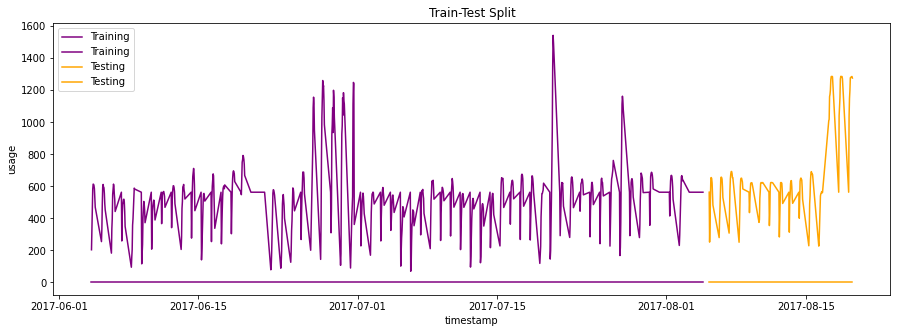

In [71]:
#displays a plot of the train/test split
fig = plt.figure(figsize=(15,5))
plt.plot(train_data0, color='purple', label='Training')
plt.plot(test_data0, color='orange', label='Testing')
plt.xlabel('timestamp')
plt.ylabel('usage')
plt.title('Train-Test Split')
plt.legend()
plt.show()

An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. 
- The model summary provides lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

- The coefficient of the MA2 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

- So, we will rebuild the model without the MA2 term


In [72]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df0.usage, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.usage   No. Observations:                  769
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -4908.716
Method:                       css-mle   S.D. of innovations            143.120
Date:                Sat, 19 Nov 2022   AIC                           9827.432
Time:                        18:57:11   BIC                           9850.657
Sample:                             1   HQIC                          9836.370
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8660      0.823      1.053      0.292      -0.746       2.478
ar.L1.D.usage     0.5925      0.047     12.514      0.000       0.500       0.685
ma.L1.D.usage    -0.7791      0.048    -

In [41]:
# 1,1,1 ARIMA Model
model = ARIMA(df0.usage, order=(1,1,1))
model_fit1 = model.fit(disp=0)
print(model_fit1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

                             ARIMA Model Results                              
Dep. Variable:                D.usage   No. Observations:                  769
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4916.375
Method:                       css-mle   S.D. of innovations            144.551
Date:                Sat, 19 Nov 2022   AIC                           9840.751
Time:                        18:39:05   BIC                           9859.331
Sample:                             1   HQIC                          9847.902
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8043      0.738      1.090      0.276      -0.642       2.250
ar.L1.D.usage     0.6957      0.035     19.856      0.000       0.627       0.764
ma.L1.D.usage    -0.9586      0.016    -

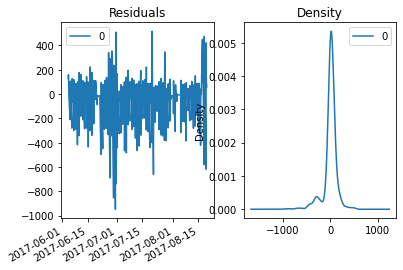

In [43]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

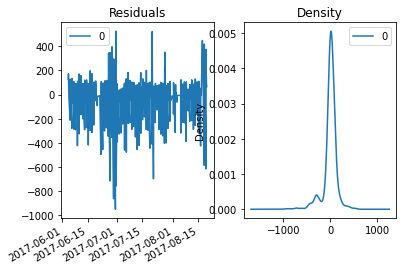

In [44]:
# Plot residual errors
residuals = pd.DataFrame(model_fit1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

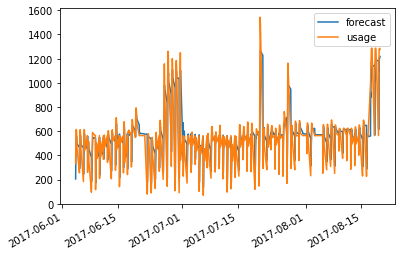

In [45]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

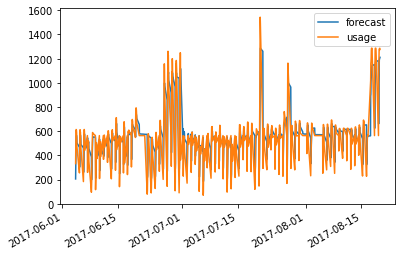

In [46]:
# Actual vs Fitted
model_fit1.plot_predict(dynamic=False)
plt.show()

These are really bad but using it manually atleast for me doesnt work but lets see trendline

In [73]:
from statsmodels.tsa.stattools import acf

In [84]:
#Lets drop municipality_id cause its for municipality_id = 0 and we know it.
train_data0 =train_data0.drop(['municipality_id'], axis=1)
test_data0 = test_data0.drop(['municipality_id'], axis=1)

In [85]:
model = ARIMA(train_data0, order=(1, 1, 1))  
fitted = model.fit(disp=-1) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [86]:
#train_data0.index = pd.DatetimeIndex(train_data0.index).to_period('D')

In [87]:
model = ARIMA(train_data0, order=(1, 1, 1))  
fitted = model.fit(disp=-1) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


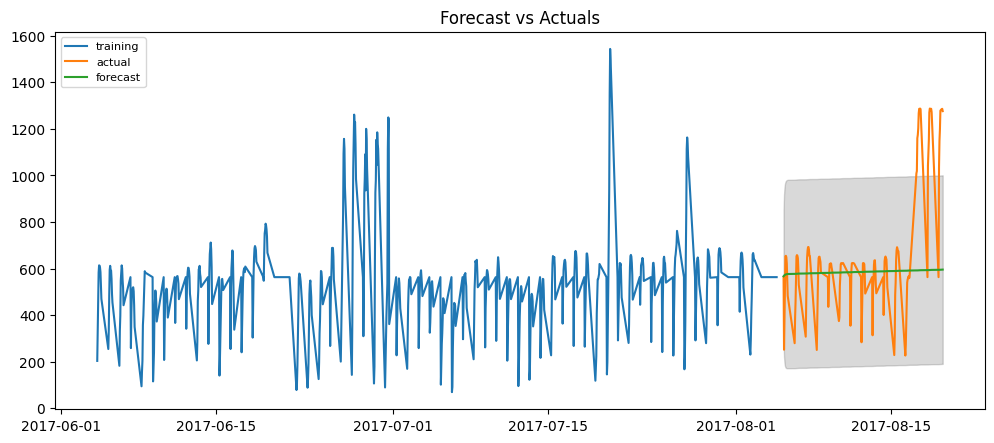

In [88]:
# Forecast
fc, se, conf = fitted.forecast(150, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data0.index)
lower_series = pd.Series(conf[:, 0], index=test_data0.index)
upper_series = pd.Series(conf[:, 1], index=test_data0.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data0, label='training')
plt.plot(test_data0, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [19]:
#as you can see its really bad. 
df0 = df0.drop(['municipality_id'], axis=1)

In [103]:
train = df0[:620]
test = df0[620:]

In [104]:
train.shape

(620, 1)

In [106]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

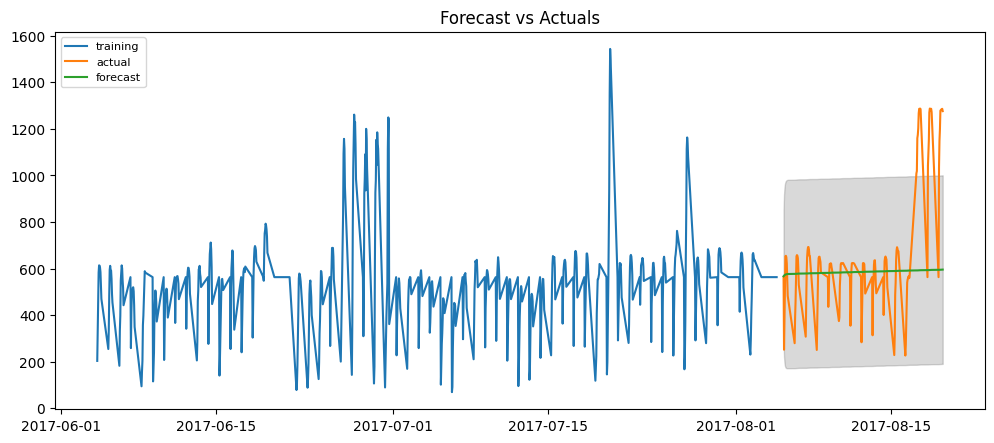

In [108]:
# Forecast
fc, se, conf = fitted.forecast(150, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

<Figure size 800x800 with 0 Axes>

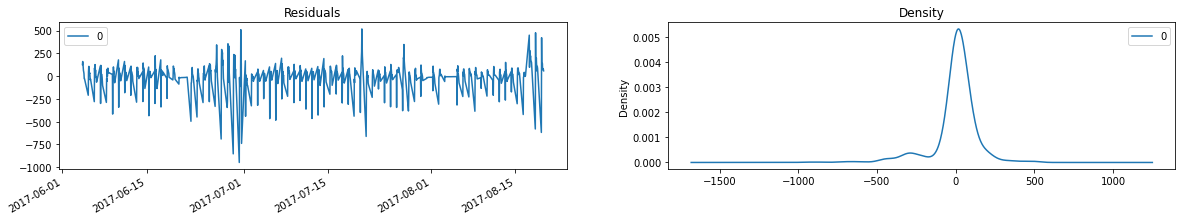

In [119]:
# Plot residual errors
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,3)
figure(figsize=(10, 10), dpi=80)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

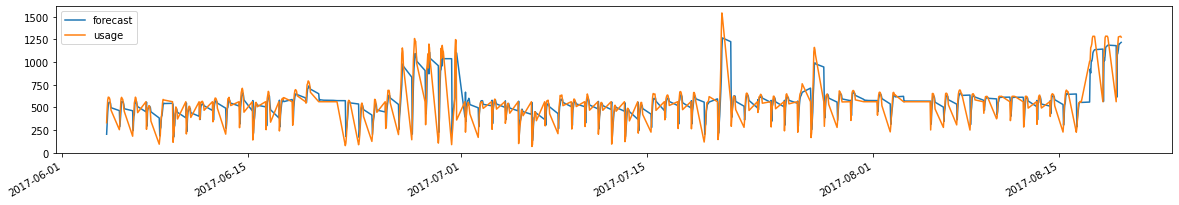

In [120]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

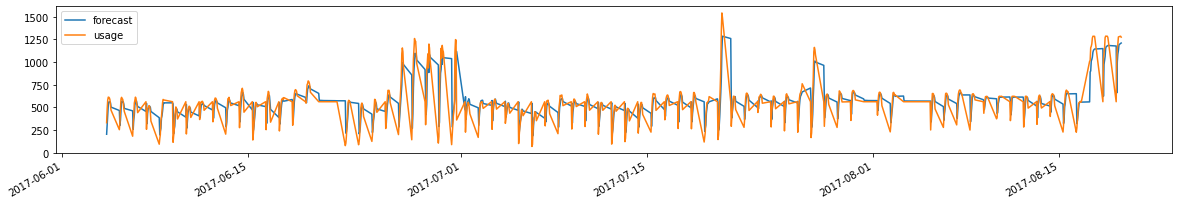

In [121]:
model_fit1.plot_predict(dynamic=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

                             ARIMA Model Results                              
Dep. Variable:                D.usage   No. Observations:                  769
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4924.865
Method:                       css-mle   S.D. of innovations            146.209
Date:                Sat, 19 Nov 2022   AIC                           9863.730
Time:                        20:18:58   BIC                           9896.246
Sample:                             1   HQIC                          9876.245
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2092      3.109      0.389      0.697      -4.885       7.303
ar.L1.D.usage    -0.0696      0.035     -1.972      0.049      -0.139      -0.000
ar.L2.D.usage    -0.0717      0.035     

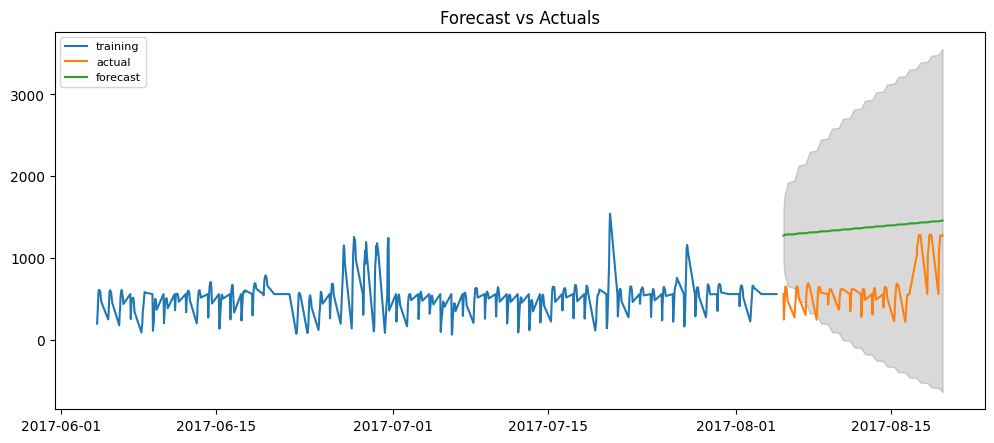

In [151]:
# Build Model
model = ARIMA(df0.usage, order=(5, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(150, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [160]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.usage)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


{'mape': 1.35828328795855,
 'me': 695.6925021647482,
 'mae': 695.6925021647482,
 'mpe': 1.35828328795855,
 'rmse': 740.4163333880833,
 'corr': 0.6049286578142136,
 'minmax': 0.5112397130014286}

In [37]:
#Minimum 70 and max 1543 range of value and we have 740 rmse, its so high error rate. Lets try another method.
df0.describe()

,usage
count,770.000000
mean,563.508902
std,230.075400
min,70.000000
25%,459.000000
50%,563.508902
75%,624.000000
max,1543.000000


In [161]:
'''In Python, the pmdarima package provides auto_arima() function which can be used to automate the process of ARIMA Forecasting in Python.

auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

We need to install the pmdarima package first.'''
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 9.6 MB/s 
     |████████████████████████████████| 9.9 MB 57.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [20]:
#ITS Auto Arima
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df0, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9840.780, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9932.121, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9934.093, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9934.100, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9930.185, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9816.986, Time=2.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9935.562, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9776.859, Time=1.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=9909.054, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9736.000, Time=1.82 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9752.669, Time=1.72 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=9740.796, Time=2.07 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9722.168, Time=1.96 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9804.828, Time=1.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept

As you can see above what we tried is actually not good but  ARIMA(3,1,3) is give best result.

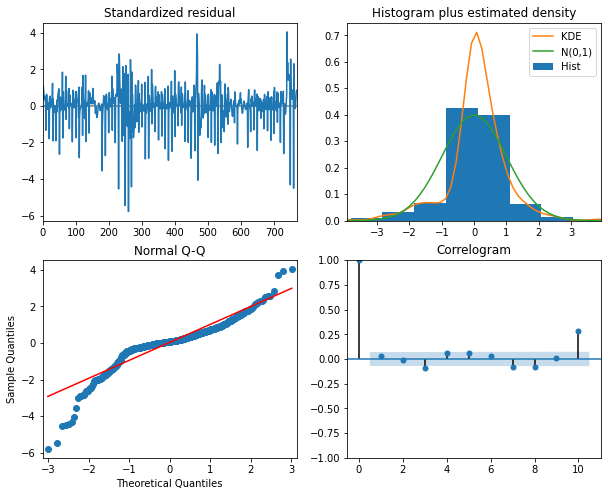

In [21]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

Interpretation of plots in plot diagnostics¶
Standardized residual: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Histogram: The density plot suggest normal distribution with mean slighlty shifted towards right.

Theoretical Quantiles: Mostly the dots fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Correlogram: The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model. So we will need to look for more X’s (predictors) to the model.

Overall, the model seems to be a good fit.

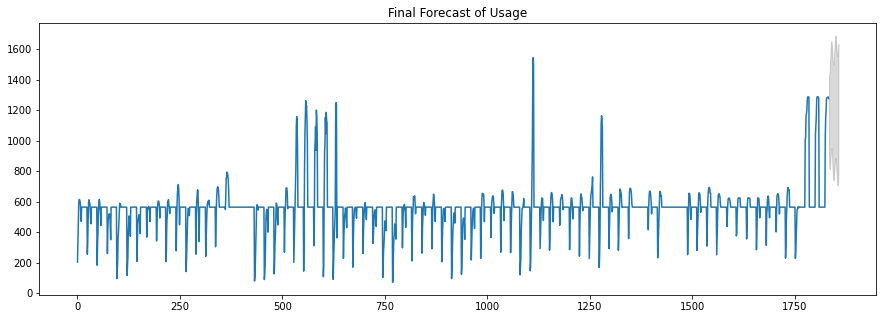

In [65]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.usage), len(df.usage)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig = plt.figure(figsize=(15,5))
plt.plot(df0.usage)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()